## Hierarchical-K_means-DBSCAN

## Importing Libraries

In [1]:
import pandas as pd                                   #read dataset
import numpy as np                                    #help in array building    
import seaborn as sns                                 #visualizing data
import matplotlib.pylab as plt                        #visualizing data
from sklearn.preprocessing import StandardScaler, normalize      #standardization of data to balance the unit between different variables  
sns.set()
import scipy.cluster.hierarchy as sch                 #for creating dendrogram 
from sklearn.cluster import AgglomerativeClustering   #for Agglomerative is a hierarchical clustering method that applies the "bottom-up" approach to group the elements in a dataset. 
from sklearn.decomposition import PCA                 #We’ll employ PCA to reduce the number of features in our data set Dimensionality Reduction
from scipy.cluster.hierarchy import linkage           #Performs hierarchical/agglomerative clustering on the condensed distance matrix
from sklearn.cluster import KMeans                    #The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data.
from sklearn.cluster import DBSCAN                    #DBSCAN is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density. 
%matplotlib inline
from scipy import stats
from sklearn.metrics import silhouette_score
import matplotlib

## Importing DataSet

In [2]:
dataset= pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
dataset.shape

(3999, 12)

## Understanding dataset

The data which we used in our analysis comprises of 12 variables including continuous variables while there were almost 3,999  observers or respondents from whom the data has been collected.

## Working Problem

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

## EDA

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


All the variables are having dtypes in 'int'

In [5]:
dataset.describe().T        #Here we will not use include='all' function as all dtypes are numeric

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [6]:
#Check missing value
dataset.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# Checking the percentage of missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

ID#                  0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award?               0.0
dtype: float64

There are no null values in our dataset.

In [8]:
# All columns name
dataset.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
#Rename columns
dataset = dataset.rename(columns={'ID#':'ID','Award?':'Award'})

In [10]:
dataset.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [11]:
# Check for rows containing duplicate
duplicate= dataset[dataset.duplicated()]
duplicate

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


There are no duplicate values in our dataset.

<AxesSubplot:xlabel='Days_since_enroll'>

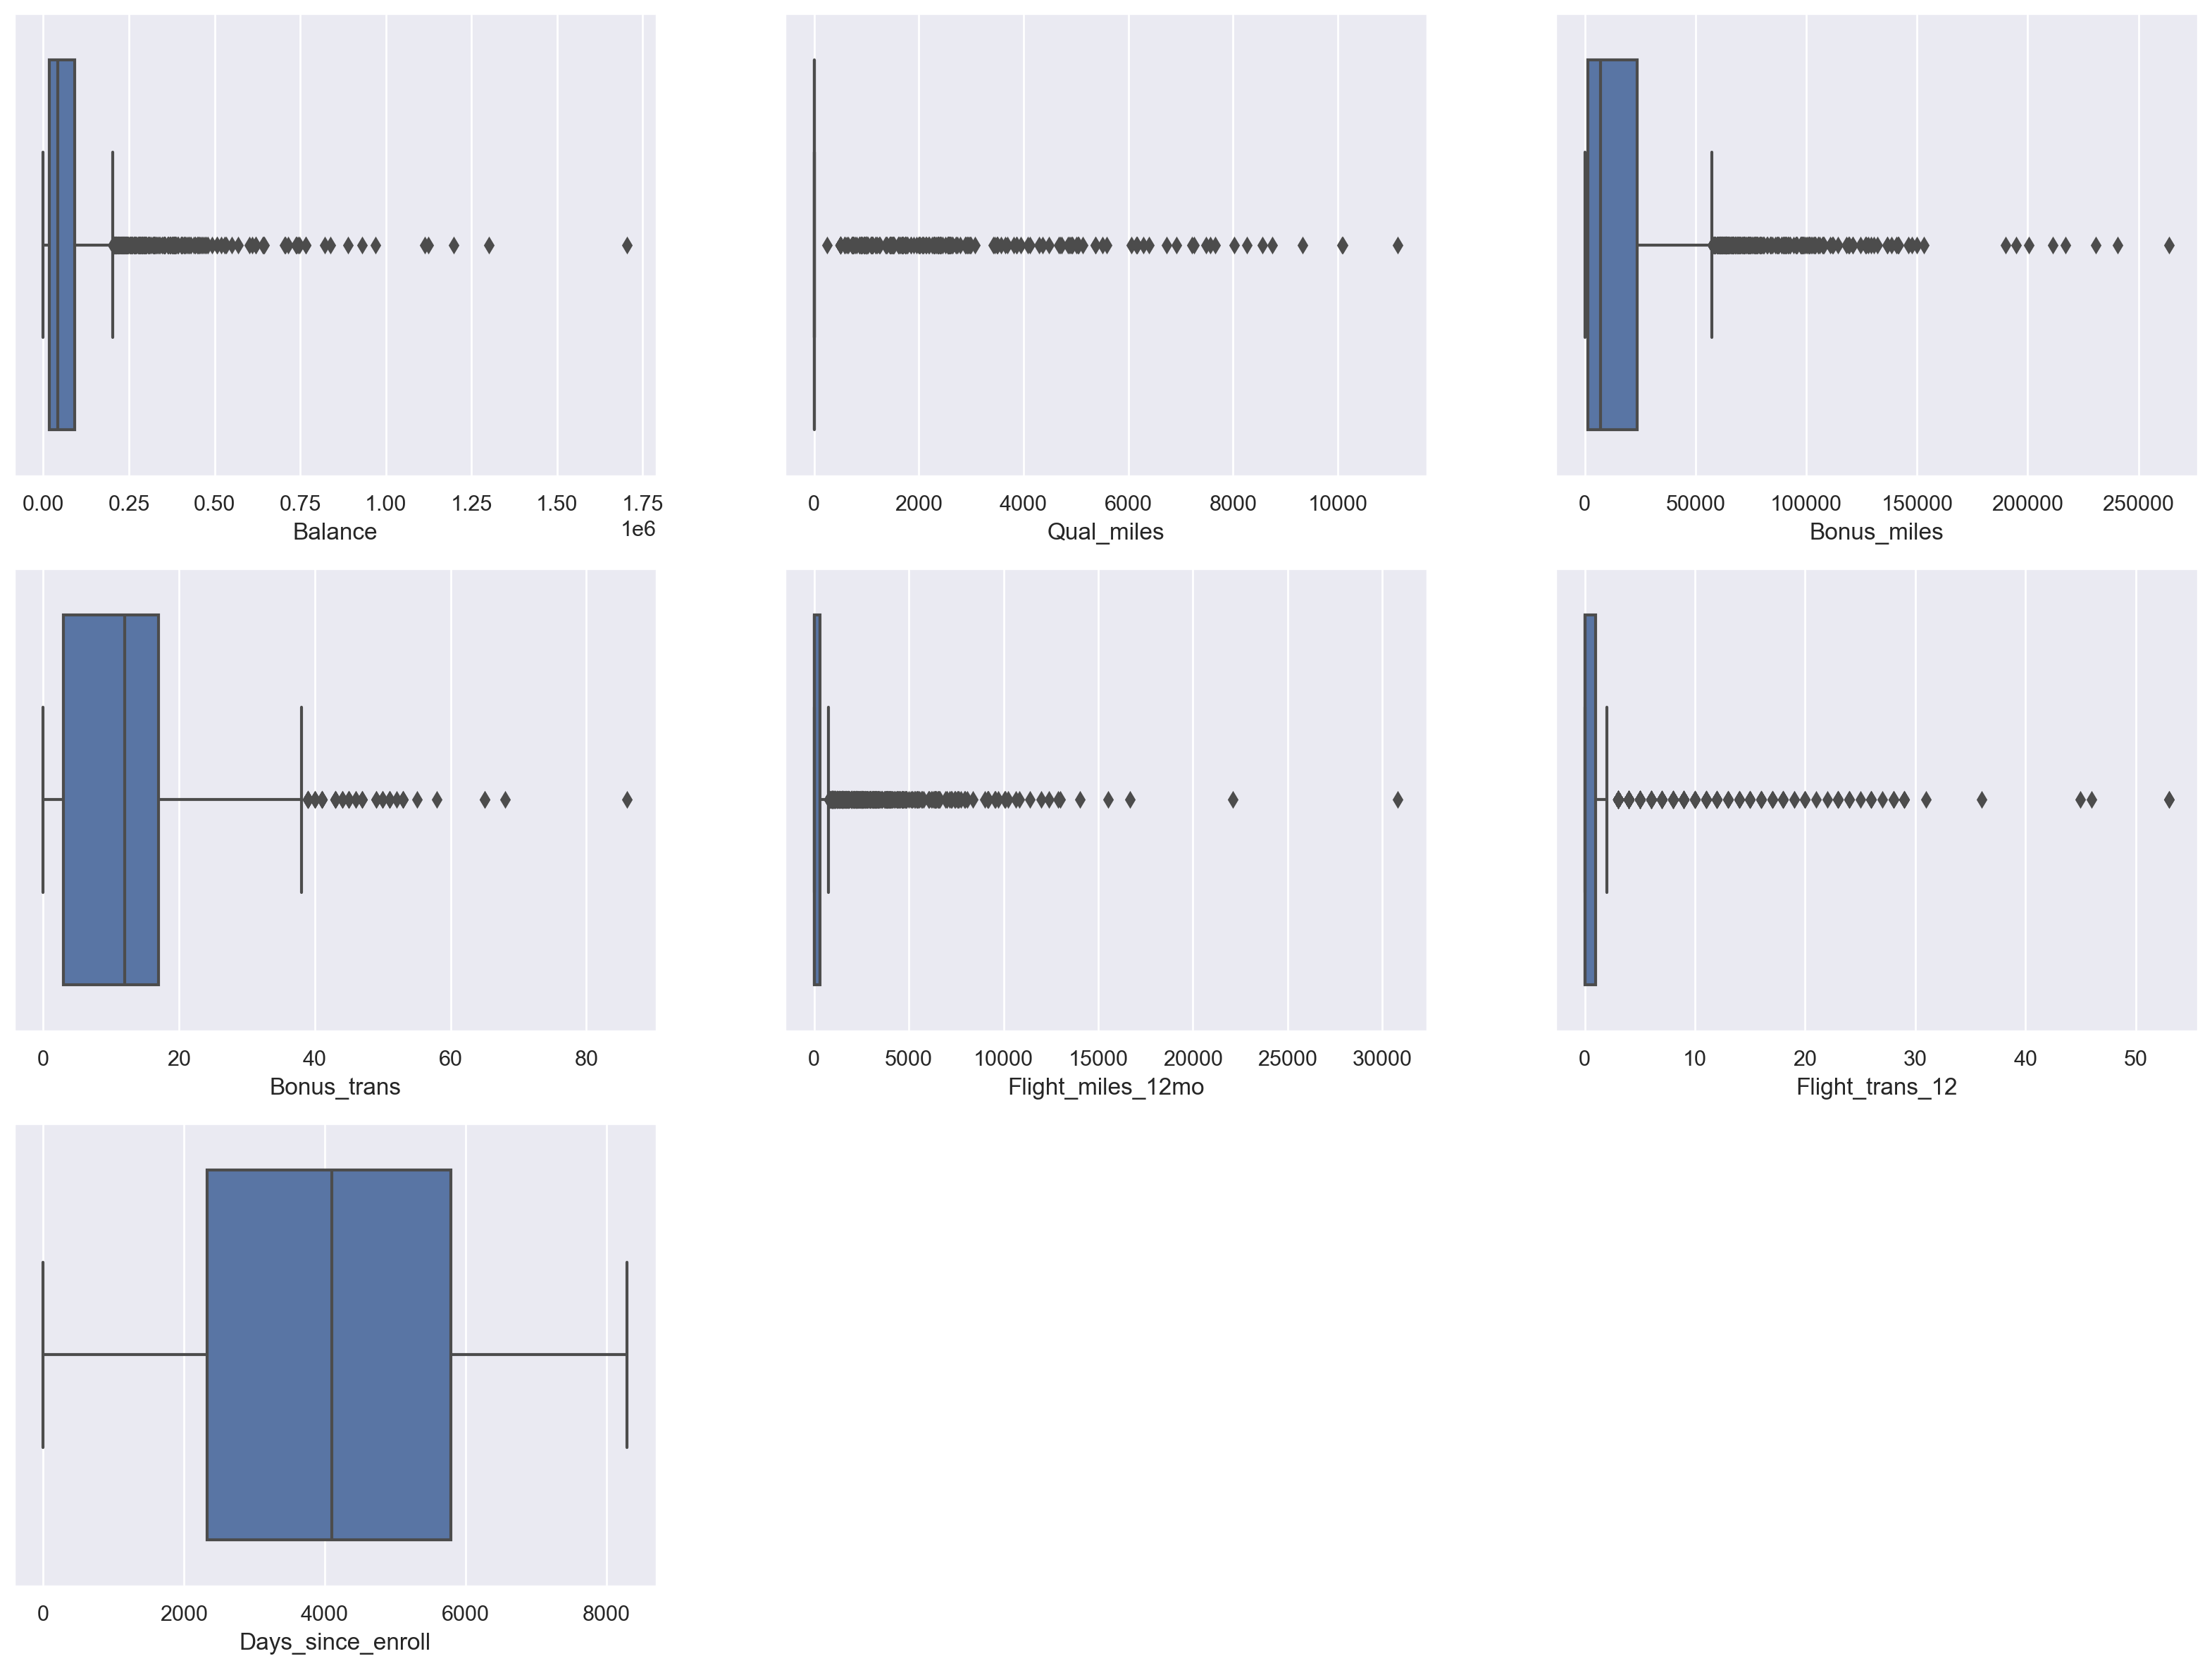

In [12]:
# checking for outliers using box-plots
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Balance', data = dataset)

plt.subplot(4,3,2)
sns.boxplot(x = 'Qual_miles', data = dataset)

plt.subplot(4,3,3)
sns.boxplot(x = 'Bonus_miles', data = dataset)

plt.subplot(4,3,4)
sns.boxplot(x = 'Bonus_trans', data = dataset)

plt.subplot(4,3,5)
sns.boxplot(x = 'Flight_miles_12mo', data = dataset)

plt.subplot(4,3,6)
sns.boxplot(x = 'Flight_trans_12', data = dataset)

plt.subplot(4,3,7)
sns.boxplot(x = 'Days_since_enroll', data = dataset)


## Finding Outlier

In [13]:
dataset.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [14]:
#Finding outliers using Inter Quartile Range (IQR)
Q1= dataset.Balance.quantile(0.25)
Q3= dataset.Balance.quantile(0.75)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)
upper= dataset.Balance>=upper_limit
print(np.where(upper))
lower= dataset.Balance<=lower_limit
print(np.where(lower))

(array([   8,   24,   32,   43,   45,   63,   68,   71,   72,   87,  111,
        114,  117,  121,  126,  127,  135,  151,  152,  155,  156,  158,
        167,  168,  172,  175,  186,  187,  188,  192,  212,  220,  221,
        237,  242,  244,  255,  256,  259,  275,  290,  292,  297,  302,
        303,  307,  313,  318,  321,  323,  325,  327,  335,  352,  357,
        362,  380,  383,  400,  404,  407,  410,  413,  420,  427,  430,
        437,  446,  448,  465,  466,  467,  471,  476,  478,  481,  488,
        500,  503,  510,  515,  521,  530,  534,  549,  557,  561,  599,
        608,  618,  624,  629,  630,  649,  652,  658,  678,  682,  683,
        692,  693,  697,  701,  702,  704,  708,  723,  743,  745,  754,
        756,  765,  777,  781,  787,  798,  820,  822,  823,  832,  868,
        869,  880,  881,  888,  896,  905,  911,  914,  917,  918,  922,
        932,  947,  963,  984,  997,  999, 1002, 1049, 1057, 1058, 1064,
       1080, 1084, 1085, 1110, 1111, 1115, 1126, 1

<AxesSubplot:xlabel='Balance'>

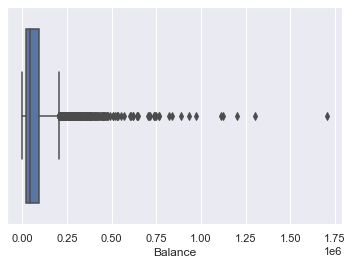

In [15]:
sns.boxplot(x = 'Balance', data = dataset)

In [16]:
# Position of the Outlier
print(np.where(dataset['Balance']>0.25))

(array([   0,    1,    2, ..., 3996, 3997, 3998], dtype=int64),)


In [17]:
#Z-score
z= np.abs(stats.zscore(dataset['Bonus_trans']))
print(z)

0       1.104065
1       0.999926
2       0.791649
3       1.104065
4       1.499394
          ...   
3994    0.791649
3995    0.687511
3996    0.375096
3997    1.104065
3998    1.208203
Name: Bonus_trans, Length: 3999, dtype: float64


In [18]:
#Finding the row number
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([   8,   65,  121,  127,  360,  410,  444,  475,  531,  534,  611,
        630,  662,  702,  830,  891,  958,  972,  998, 1639, 1707, 1917,
       2015, 2169, 2181, 2334, 2448, 2469, 2474, 2709, 2775, 2990, 2999,
       3014, 3235, 3249, 3261, 3346, 3366, 3429, 3444, 3533, 3583, 3587,
       3594, 3837, 3846], dtype=int64),)


In [19]:
#seeing the row data
result= dataset.iloc[[   8,   65,  121,  127,  360,  410,  444,  475,  531,  534,  611,
        630,  662,  702,  830,  891,  958,  972,  998, 1639, 1707, 1917,
       2015, 2169, 2181, 2334, 2448, 2469, 2474, 2709, 2775, 2990, 2999,
       3014, 3235, 3249, 3261, 3346, 3366, 3429, 3444, 3533, 3583, 3587,
       3594, 3837, 3846]]
result

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1
127,130,213150,0,4,1,1,56308,41,5200,14,7645,1
360,365,22080,0,1,1,1,12200,47,1950,9,7050,1
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1
444,450,192104,0,3,1,1,39010,53,1750,8,8289,1
475,481,171509,0,3,1,1,40090,55,6381,23,8151,1
531,537,98472,1776,5,1,1,124421,45,10250,28,6621,1
534,540,267404,0,5,1,1,263685,51,3000,6,6584,1


<AxesSubplot:>

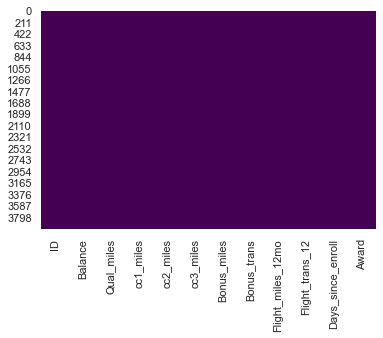

In [20]:
# Visualizing null values
sns.heatmap(dataset.isnull(),cbar=False, cmap='viridis')

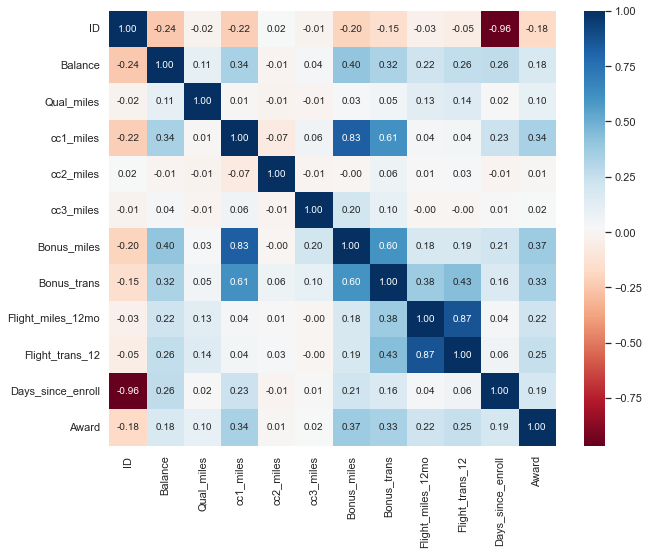

In [21]:
corr= dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='RdBu',fmt='.2f')
plt.show()

<AxesSubplot:ylabel='Balance'>

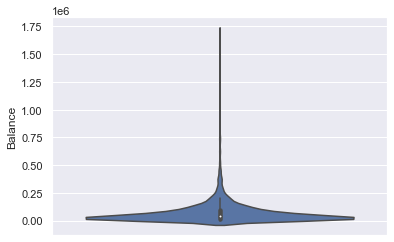

In [22]:
sns.violinplot(y='Balance',data=dataset)

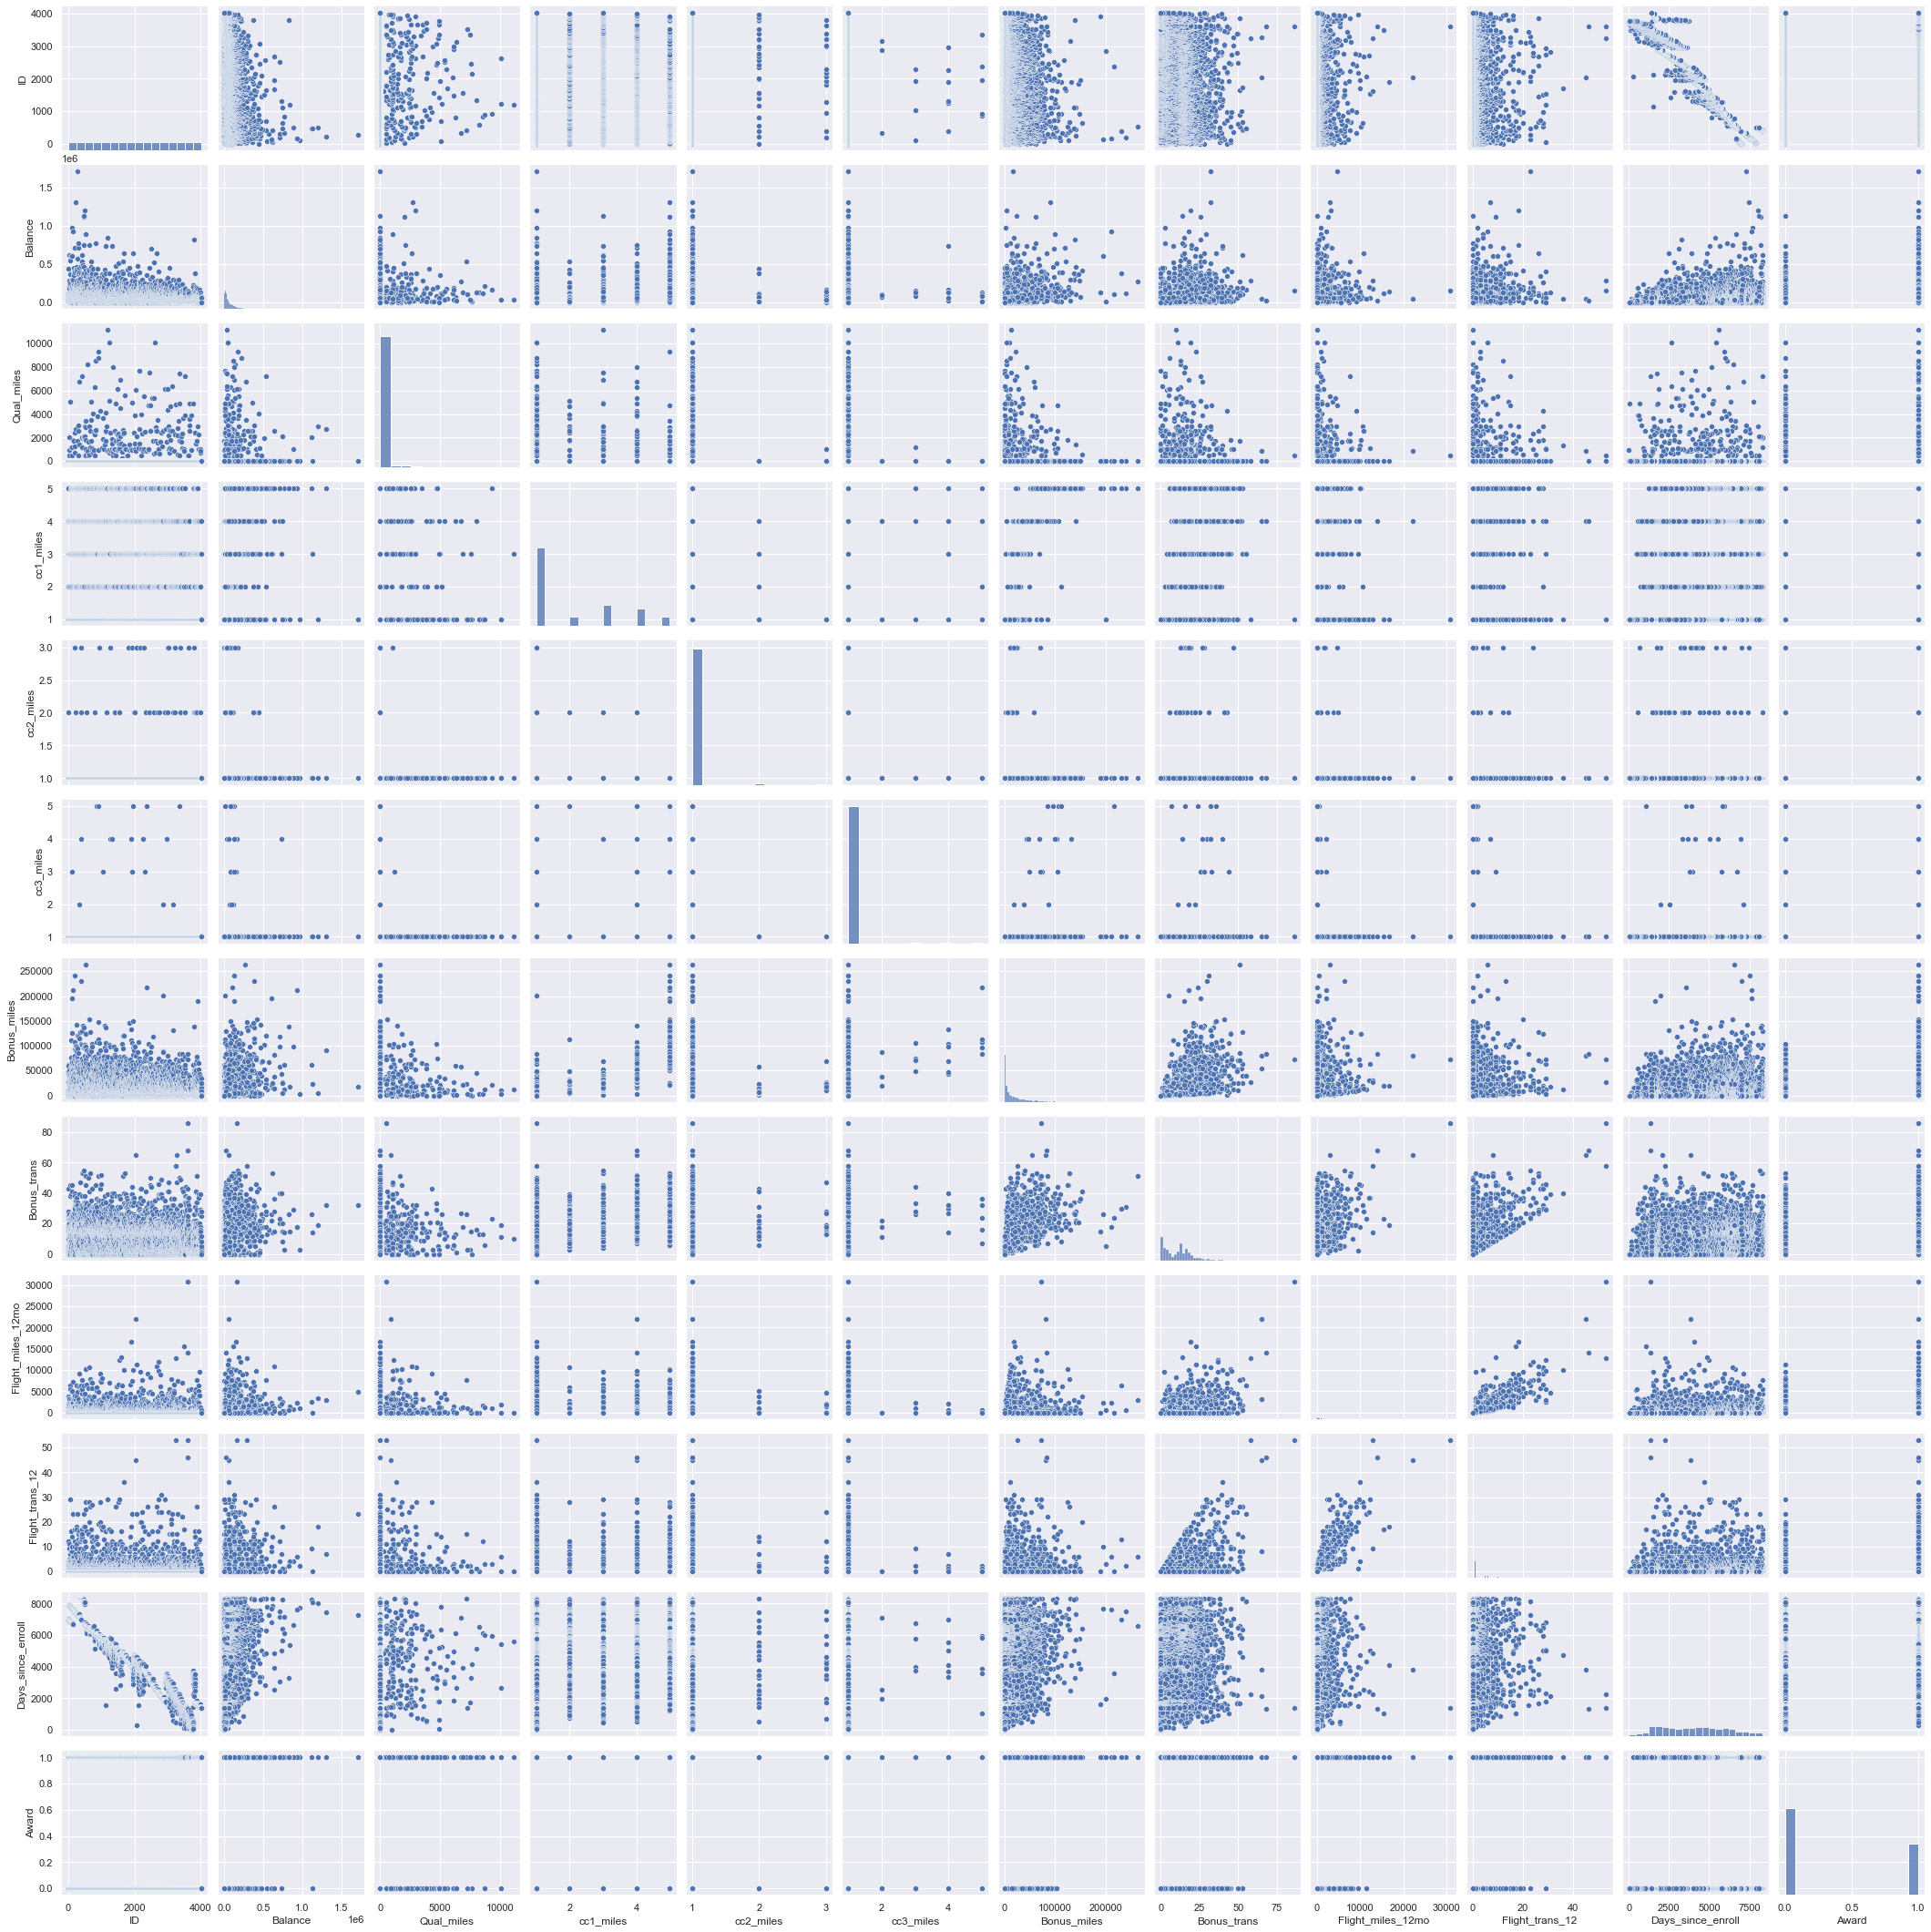

In [23]:
sns.pairplot(dataset)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

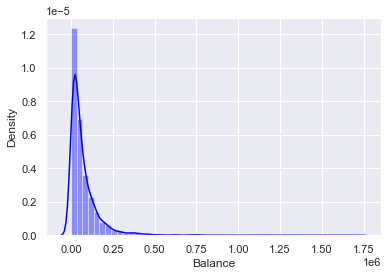

In [24]:
sns.distplot(dataset.Balance,kde=True,color='blue')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_miles_12mo', ylabel='Density'>

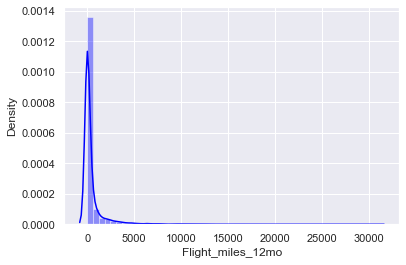

In [25]:
sns.distplot(dataset.Flight_miles_12mo,kde=True,color='blue')

<AxesSubplot:xlabel='Balance', ylabel='Flight_miles_12mo'>

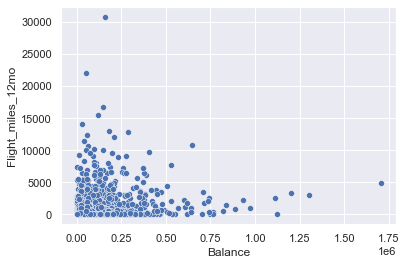

In [26]:
sns.scatterplot(x='Balance',y='Flight_miles_12mo',data=dataset)

In [27]:
dataset.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [28]:
dataset

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Preprocessing the data

In [29]:
## Scaling the data so that all the features become comparable
scale= StandardScaler()
scale_dataset= scale.fit_transform(dataset)
scale_dataset

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [30]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
normalize_dataset = normalize(scale_dataset)

In [31]:
# Converting the numpy array into a pandas DataFrame
normalize_dataset = pd.DataFrame(normalize_dataset)

## Reducing the dimensionality of the Data

In [32]:
pca=PCA()
pca.fit(normalize_dataset)

PCA()

In [33]:
pca.explained_variance_ratio_

array([0.36849733, 0.24586502, 0.14735127, 0.07939134, 0.05418316,
       0.03926705, 0.02626795, 0.01352222, 0.0103799 , 0.00583999,
       0.00527353, 0.00416124])

Text(0, 0.5, 'Cumulative Explained Variance')

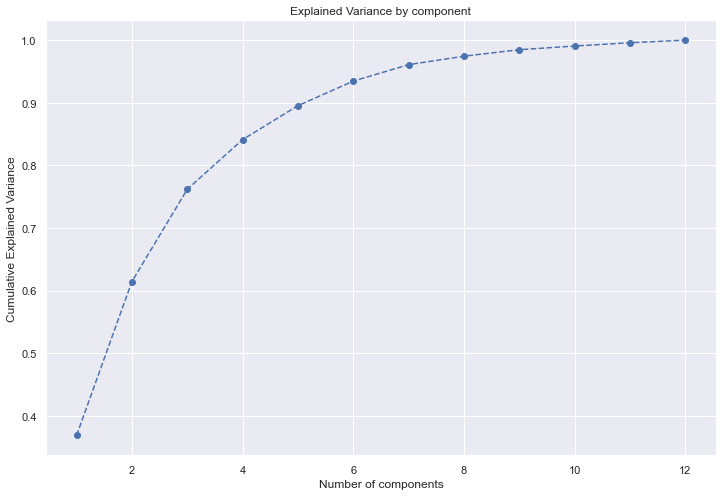

In [34]:
plt.figure(figsize=(12,8))
plt.plot(range(1,13),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by component')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [35]:
#PCA with choose number of component
#We choose three components. 3 or 4 seems the right choice according to the previous graph 
pca= PCA(n_components=3)
# fit the model with our selected number of components. in our case five
X_principal= pca.fit_transform(normalize_dataset)
X_principal= pd.DataFrame(X_principal)
X_principal.columns= ['P1','P2','P3']
X_principal.head()

,P1,P2,P3
0,0.004104,-0.932399,0.002192
1,0.008577,-0.931160,-0.002195
2,0.076068,-0.941372,-0.043663
3,-0.006810,-0.925817,0.008537
4,1.050549,-0.041270,0.096186


## Hierarchical Clustering

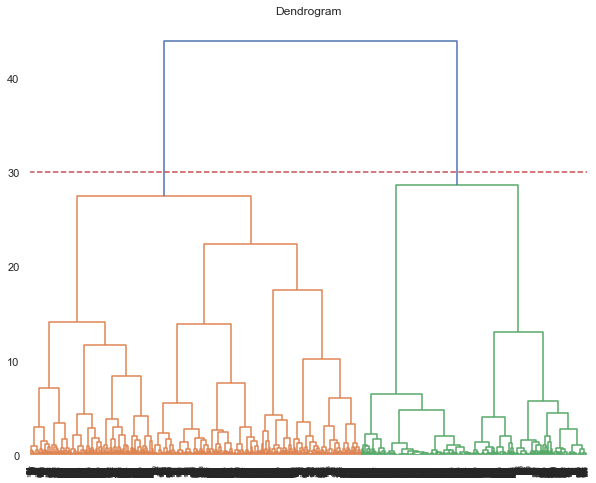

In [36]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(X_principal,method='ward',metric='euclidean'))
plt.axhline(y=30, color='r', linestyle='--')

To determine the optimal number of clusters by visualizing the data, imagine all the horizontal lines as being completely horizontal and then after calculating the maximum distance between any two horizontal lines, draw a horizontal line in the maximum distance calculated.

The above image shows that the optimal number of clusters should be 2 for the given data.

a) Apply hierarchical clustering with Euclidean distance and Ward’s method. Make sure to standardize the data first. How many clusters appear?

Ans:- There are 2 clusters appear

b) What would happen if the data were not standardized?

Ans:- If we not standardized the data the scale will be biased while calculating between cluster and within clusters, the large values will impact the variables having small values.

## Building and Visualizing the different clustering models for different values of k

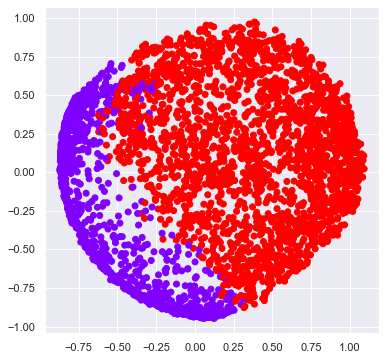

In [37]:
#We have two cluster now we will use Agglomerative Clustering
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Ward method is commanly used since it is simpler to visualize understanding.
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = cluster.fit_predict(X_principal), cmap ='rainbow')
plt.show()

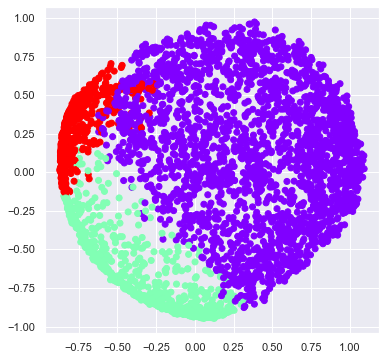

In [38]:
# If k=3 taken
cluster3 = AgglomerativeClustering(n_clusters = 3,linkage='ward',affinity='euclidean')
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = cluster3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

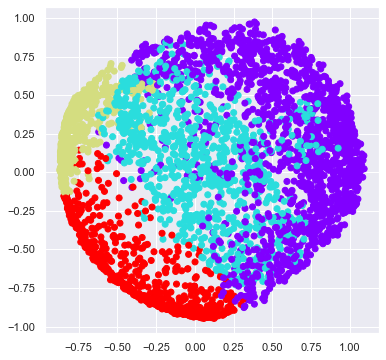

In [39]:
# If k=4 taken
cluster4 = AgglomerativeClustering(n_clusters = 4,linkage='ward',affinity='euclidean')
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = cluster4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

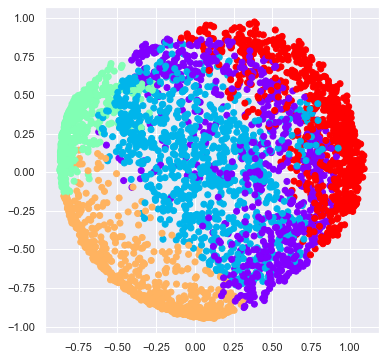

In [40]:
# If k=5 taken
cluster5 = AgglomerativeClustering(n_clusters = 5,linkage='ward',affinity='euclidean')
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = cluster5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Method 2: Silhouette Score method

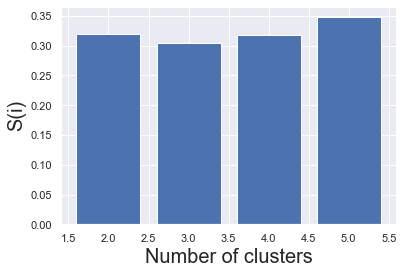

In [41]:
k = [2, 3, 4, 5]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, cluster.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, cluster3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, cluster4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, cluster5.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

With the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 5 or 2.

In [42]:
dataset_new= pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
dataset_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [43]:
h_complete = AgglomerativeClustering(n_clusters=2, linkage='ward',affinity = "euclidean").fit(X_principal) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
dataset_new['clust']=cluster_labels # creating a  new column and assigning it to new column 
dataset_new.head
dataset_new.iloc[:,:].groupby(dataset_new.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0,2337.302599,33481.089728,8.794554,1.053837,1.000000,1.000000,2493.121906,5.084777,86.415223,0.298267,3510.682550,0.000000
1,1796.131767,100808.337390,235.879983,2.741502,1.024339,1.020562,27080.719681,16.021402,713.435166,2.102812,4530.783047,0.621486


From the above table it seem that the cluster solution recognized the groups by old customer (Days_since_enroll), bonus miles and balance.

Cluster0 (Non-frequent Travellers) : Has highest number of observations. This cluster contains customers who are relatively new with low balance and bonus miles.

Cluster1 (Frequent Flyers): Has low number of observations. This cluster contains customers who are relatively old with both high balance and bonus miles.

As there are larger numbers of observations; interpreting the results will be difficult or cumbersome. Some of the observation are overlapping. 

## K-means clustering 

In [44]:
#WE fit K means using the transformed data from the PCA
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans_pca.fit(X_principal)
    wcss.append(kmeans_pca.inertia_)

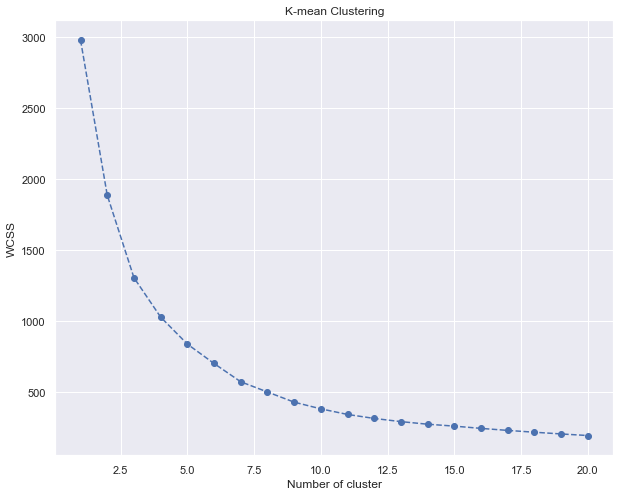

In [45]:
#The next step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-mean Clustering')
plt.show()

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 4 clusters mark. So, we’ll be keeping a four-cluster solution.

In [46]:
#All left to do is to implement it.
#We have chosen four clusters, so we run K-means with number of clusters equals four.
#Same initilizer and random state as before.
kmeans_pca=KMeans(n_clusters=4,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [47]:
#We fit our data with K-means model
kmeans_pca.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

## Analyze the Results of PCA and K-Means Clustering

In [48]:
#we create a new data frame with the original features and add the PCA scores and assigned clusters.
dataset_kmeans= pd.concat([dataset_new.reset_index(drop=True),pd.DataFrame(X_principal)],axis=1)
dataset_kmeans.columns.values[-3:]=['P1','P2','P3']
#The last column we add the pca K-means clustering labels.
dataset_kmeans['K_means_segment']=kmeans_pca.labels_

In [49]:
dataset_kmeans.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,P1,P2,P3,K_means_segment
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.004104,-0.932399,0.002192,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.008577,-0.931160,-0.002195,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.076068,-0.941372,-0.043663,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,-0.006810,-0.925817,0.008537,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1.050549,-0.041270,0.096186,0


In [50]:
dataset_kmeans['Segment']=dataset_kmeans['K_means_segment'].map({0:'first',1:'second',2:'third',3:'fourth'})

In [51]:
dataset_kmeans.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,P1,P2,P3,K_means_segment,Segment
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.004104,-0.932399,0.002192,2,third
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.008577,-0.931160,-0.002195,2,third
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.076068,-0.941372,-0.043663,2,third
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,-0.006810,-0.925817,0.008537,2,third
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1.050549,-0.041270,0.096186,0,first


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


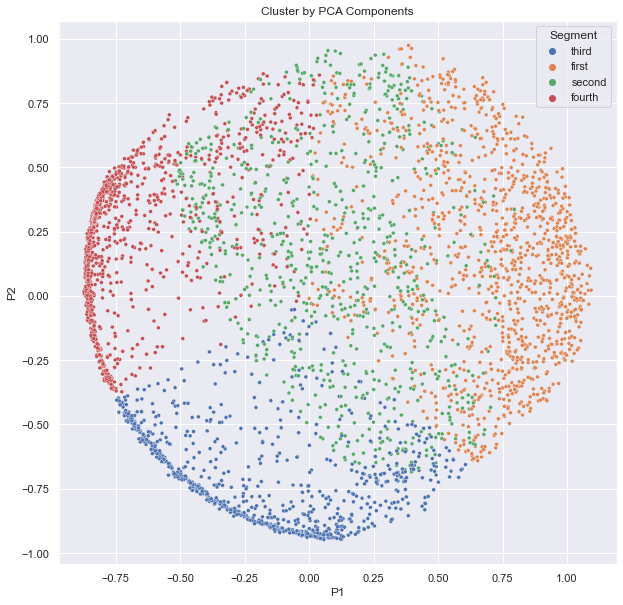

In [52]:
#let’s visualize the segments with respect to the first two components.
x_axis= dataset_kmeans['P1']
y_axis= dataset_kmeans['P2']
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(x_axis,y_axis,hue=dataset_kmeans['Segment'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Cluster by PCA Components')
plt.show()

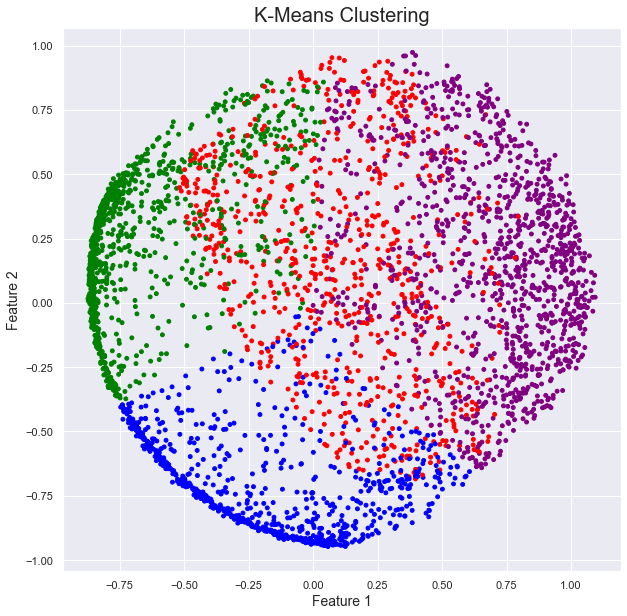

In [53]:
# Plotting K-means segment resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(x_axis,y_axis,c=dataset_kmeans['K_means_segment'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [54]:
# As we passed n_cluster to be 4 we get 4 centres of the clusters
kmeans_pca.cluster_centers_

array([[ 0.69254864,  0.15190928, -0.17387809],
       [ 0.1072909 ,  0.15524473,  0.5394217 ],
       [-0.16409386, -0.69462683, -0.08536035],
       [-0.66992516,  0.25523742, -0.12981824]])

c) Compare the cluster centroids to characterize the different clusters and try to give each cluster a label.

Ans:- 

## DBSCAN Clustering

For epsilon,K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.


In [55]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)

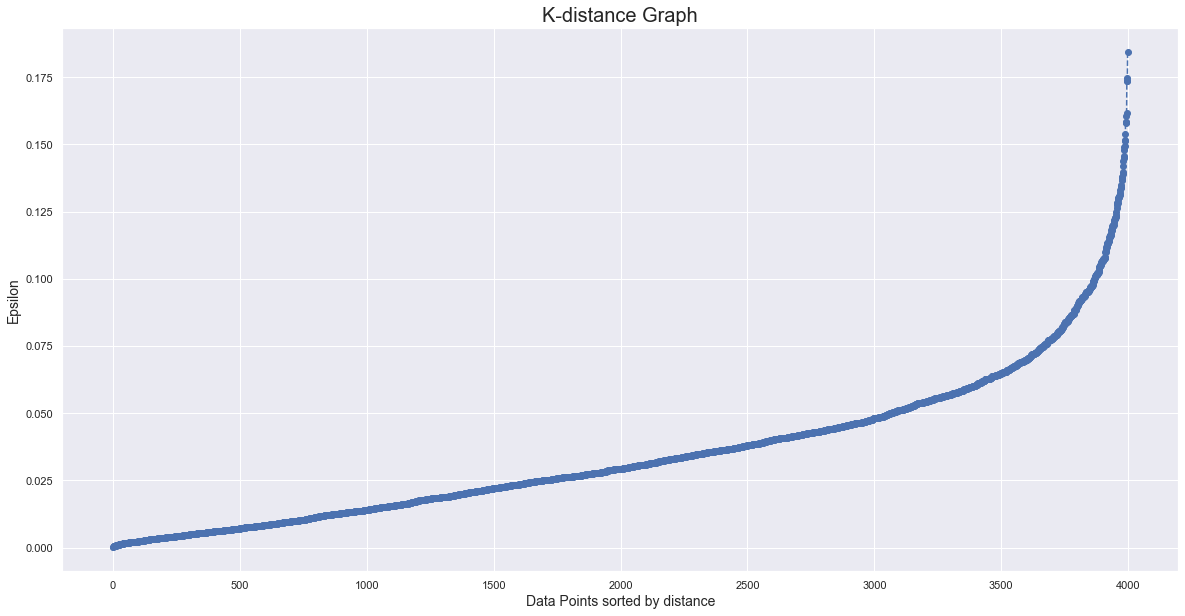

In [56]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances,marker='o',linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph,

In [57]:
dbscan_opt=DBSCAN(eps=0.125,min_samples=10,metric='euclidean')
dbscan_opt.fit(X_principal)

DBSCAN(eps=0.125, min_samples=10)

In [58]:
dataset_kmeans['DBSCAN_opt_labels']=dbscan_opt.labels_
dataset_kmeans['DBSCAN_opt_labels'].value_counts()

 0    2383
 1    1246
-1     357
 2      13
Name: DBSCAN_opt_labels, dtype: int64

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well,-1 is the noise.

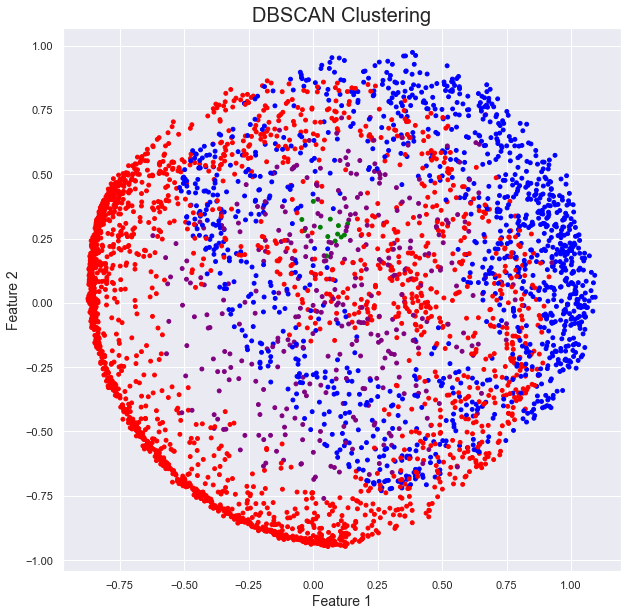

In [59]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(x_axis,y_axis,c=dataset_kmeans['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

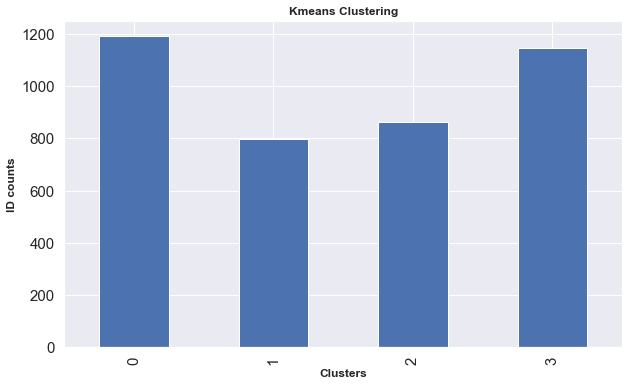

In [60]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
dataset_kmeans.groupby(['K_means_segment']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [61]:
dataset_kmeans

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,P1,P2,P3,K_means_segment,Segment,DBSCAN_opt_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.004104,-0.932399,0.002192,2,third,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.008577,-0.931160,-0.002195,2,third,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.076068,-0.941372,-0.043663,2,third,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,-0.006810,-0.925817,0.008537,2,third,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1.050549,-0.041270,0.096186,0,first,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,-0.456508,0.579735,0.602989,1,second,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,-0.458815,0.562616,0.566471,1,second,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,-0.044889,0.876557,0.323723,1,second,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,-0.807668,0.369655,0.011032,3,fourth,0


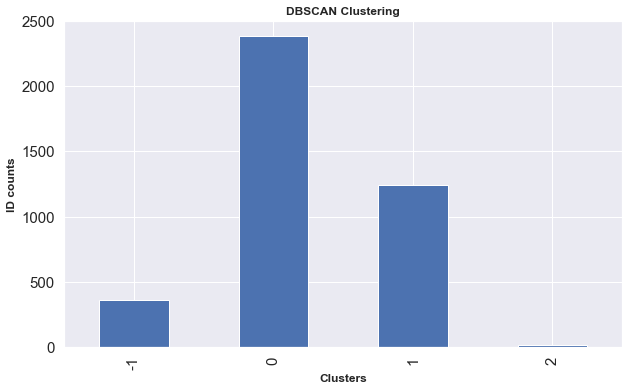

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
dataset_kmeans.groupby(['DBSCAN_opt_labels']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

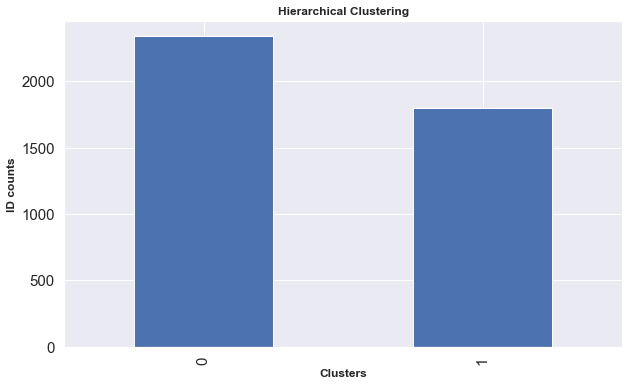

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
dataset_new.groupby(dataset_new.clust).mean()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## d) To check the stability of the clusters, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge?

In [64]:
dataset_random= dataset_new.sample(frac=0.95)
dataset_random.shape

(3799, 13)

In [65]:
## Scaling the data so that all the features become comparable
scale1= StandardScaler()
scale_dataset1= scale.fit_transform(dataset_random)
scale_dataset1

array([[-1.24785364, -0.72975005, -0.18340221, ...,  1.17441262,
        -0.76824808, -1.2124731 ],
       [ 1.03946388,  0.41815807, -0.18340221, ..., -0.80887216,
        -0.76824808,  0.82476056],
       [-1.7298488 , -0.21420545, -0.18340221, ...,  1.36133175,
         1.30166288,  0.82476056],
       ...,
       [-1.04140769, -0.61269123, -0.18340221, ...,  0.49179368,
        -0.76824808, -1.2124731 ],
       [-0.07655358,  0.24419413, -0.18340221, ..., -0.01555824,
        -0.76824808,  0.82476056],
       [ 1.26145806, -0.53602475, -0.18340221, ..., -1.2963184 ,
        -0.76824808, -1.2124731 ]])

In [66]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
normalize_dataset1 = normalize(scale_dataset1)

In [67]:
# Converting the numpy array into a pandas DataFrame
normalize_dataset1 = pd.DataFrame(normalize_dataset1)

In [68]:
#Reducing the dimensionality of the Data
pca1=PCA()
pca1.fit(normalize_dataset1)

PCA()

In [69]:
explained_variance_ratio=pca1.explained_variance_ratio_
explained_variance_ratio

array([0.4083452 , 0.21294101, 0.12772222, 0.07057988, 0.04638002,
       0.04477004, 0.03224377, 0.0239562 , 0.01100826, 0.00883127,
       0.00465886, 0.00452371, 0.00403955])

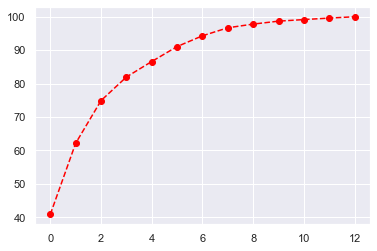

In [70]:
var1 = np.cumsum(np.round(explained_variance_ratio,decimals = 4)*100)
plt.plot(var1,color="red",marker='o',linestyle='--')

In [71]:
#PCA with choose number of component
#We choose five components. 3 or 4 seems the right choice according to the previous graph 
pca1= PCA(n_components=3)
# fit the model with our selected number of components. in our case five
X_principal1= pca1.fit_transform(normalize_dataset1)
X_principal1= pd.DataFrame(X_principal1)
X_principal1.columns= ['P1_r','P2_r','P3_r']
X_principal1.head()

,P1_r,P2_r,P3_r
0,-0.437964,0.807531,0.040257
1,0.198370,-0.722330,-0.491710
2,0.896800,0.367768,0.033480
3,-0.802590,-0.445074,-0.007998
4,0.409169,0.618382,-0.302060


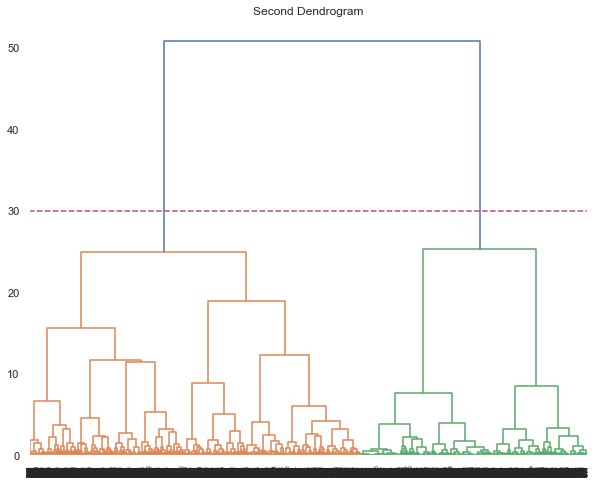

In [72]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('Second Dendrogram')
dendrogram1= sch.dendrogram(sch.linkage(X_principal1,method='ward',metric='euclidean'))
plt.axhline(y=30, color='r', linestyle='--')

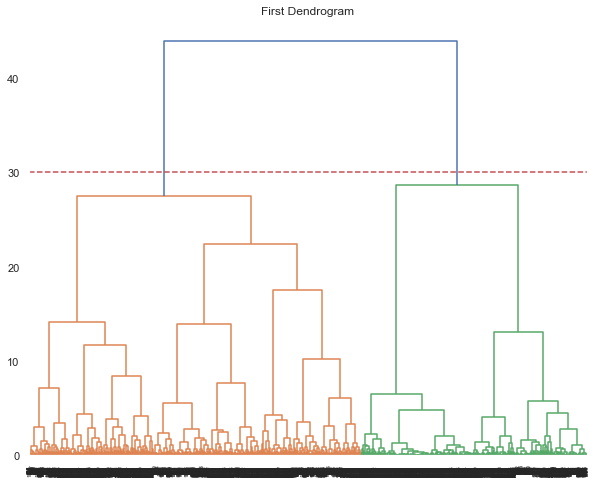

In [73]:
#Combine PCA and Hierarchical Clustering. Visualizing the working of the Dendograms 
plt.figure(figsize=(10,8))
plt.title('First Dendrogram')
dendrogram= sch.dendrogram(sch.linkage(X_principal,method='ward',metric='euclidean'))
plt.axhline(y=30, color='r', linestyle='--')

d) To check the stability of the clusters, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge?

Ans:- If we compare the new dendrogram with old one, we can see the change in scale between clustering groups, although the picture looks same. so, removing 5% of the data will impact the clustering groups. 

### e) Use k-means clustering with the number of clusters that you found above in Part(a). Does the same picture emerge? If not, how does it contrast or validate the finding in Part c above?

In [74]:
kmeans_pca1=KMeans(n_clusters=2,init='k-means++',max_iter=300, n_init=10, random_state=0)

In [75]:
#We fit our data with K-means model
kmeans_pca1.fit(X_principal)

KMeans(n_clusters=2, random_state=0)

In [76]:
#The last column we add the pca K-means clustering labels.
dataset_kmeans['K_means_segment_2']=kmeans_pca1.labels_
dataset_kmeans.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,P1,P2,P3,K_means_segment,Segment,DBSCAN_opt_labels,K_means_segment_2
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0.004104,-0.932399,0.002192,2,third,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0.008577,-0.931160,-0.002195,2,third,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0.076068,-0.941372,-0.043663,2,third,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,-0.006810,-0.925817,0.008537,2,third,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1.050549,-0.041270,0.096186,0,first,1,1


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


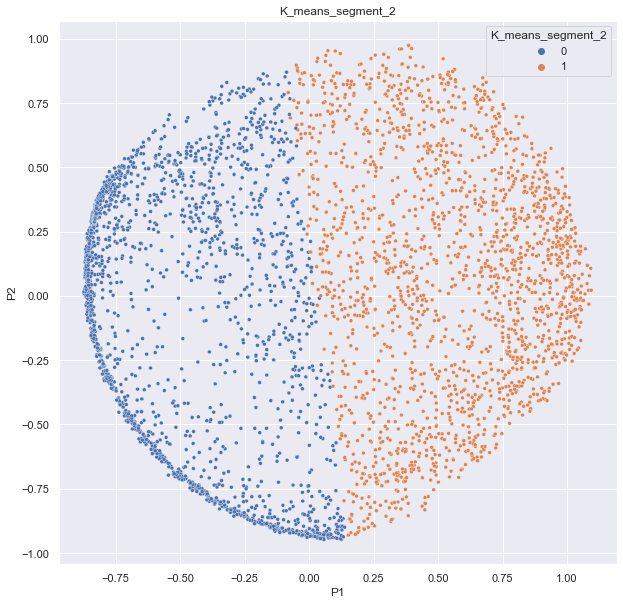

In [77]:
#let’s visualize the segments_2 with respect to the first two components.
x_axis= dataset_kmeans['P1']
y_axis= dataset_kmeans['P2']
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
sns.scatterplot(x_axis,y_axis,hue=dataset_kmeans['K_means_segment_2'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K_means_segment_2')
plt.show()

e) Use k-means clustering with the number of clusters that you found above in Part(a). Does the same picture emerge? If not, how does it contrast or validate the finding in Part c above?

Ans:- The data are well clustered here,we have seen there were overlapping of data in Hierarchical Clustering but in K-means the model has well grouped the data under Non-frequent Travellers and Frequent Flyers on the basis of Days_since_enroll, bonus miles and balance. 

### f) Which cluster(s) would you target for offers, and what type of offers would you target to customers in that cluster? Include proper reasoning in support of your choice of cluster(s) and the corresponding offer(s).

Ans:- Well, we will target for the non frequent flyers as the number of observation are high for them in every clustering, we can provide them with discounted air fare rates can be offered to improve the number of flyers & offers on 'number of miles earned with different credit card'.  